<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Weekly-COVID-19-Mortality-Tracking-in-US-(Age-related-Trends,-etc)" data-toc-modified-id="Weekly-COVID-19-Mortality-Tracking-in-US-(Age-related-Trends,-etc)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Weekly COVID-19 Mortality Tracking in US (Age-related Trends, etc)</a></span><ul class="toc-item"><li><span><a href="#Import-libraries-and-functions" data-toc-modified-id="Import-libraries-and-functions-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Import libraries and functions</a></span></li><li><span><a href="#Set-up-configuration-variables-and-parameters" data-toc-modified-id="Set-up-configuration-variables-and-parameters-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Set up configuration variables and parameters</a></span></li><li><span><a href="#Retrieve,-parse-and-preprocess-the-data" data-toc-modified-id="Retrieve,-parse-and-preprocess-the-data-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Retrieve, parse and preprocess the data</a></span></li><li><span><a href="#Calculate-metrics" data-toc-modified-id="Calculate-metrics-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Calculate metrics</a></span></li><li><span><a href="#Plotting-the-results" data-toc-modified-id="Plotting-the-results-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Plotting the results</a></span></li></ul></li></ul></div>

# Weekly COVID-19 Mortality Tracking in US (Age-related Trends, etc)
This is a code supplement to the preprint "" () which expands the paper with newer data and additional plots. Newer data shows how the second outbreaks morphs into the third.


## Import libraries and functions


In [10]:
from copy import deepcopy
import pandas as pd
import numpy as np
import os
import sys 
import warnings 
if not sys.warnoptions: 
    warnings.simplefilter("ignore") # suppress/ignore unimportant warnings
from data_preprocessing import data_preprocessing
from general_utils import read_csv, get_CDC_data_Socrates
from metrics_calculation import calc_weekly_COVID_death_average, calc_weekly_COVID_death_slopes_model
from plot_covid_utils import plot_mortality_age_structure, plot_mortality_65plus, \
    plot_layered_65plus, plot_average_vs_noncovid, plot_slope_vs_deaths, plot_deaths_regression_slopes, \
    plot_65plus_vs_noncovid, plot_slope_vs_noncovid,    \
    plot_average_over_noncovid, plot_65plus_over_noncovid, plot_slope_over_noncovid


## Set up configuration variables and parameters

These parameters determine the range of 2020 weeks in question. 



In [11]:
CDC_Service         = "data.cdc.gov"
CDC_Service_page    = "vsak-wrfu"
PANDEMIC_START_WEEK = 12 #12 is starting point for the pandemic
PANDEMIC_CURRENT_WEEK = 47
US_POPULATION_FILE     = r'./US_population_2020.csv'
PANDEMIC_HIGH_WEEK  = 42 #17 - first outbreak peak, 42 - second so far
PANDEMIC_LOW_WEEK   = 27
EARLY_AGE_CUTOFF    = 25

## Retrieve, parse and preprocess the data
This retrieves the current COVID-19 mortality data from CDC API service which comes in weekly batches. US general population data for 2020 is read from the locally accessible CSV file. 

Weekly death counts are printed below for total and COVID-19 only.


In [12]:
# input_raw_data
whole_json_dict = get_CDC_data_Socrates(CDC_Service, CDC_Service_page)
population_data = read_csv(US_POPULATION_FILE)
df_population   = pd.DataFrame(population_data)
high_week       = PANDEMIC_HIGH_WEEK - PANDEMIC_START_WEEK
low_week        = PANDEMIC_LOW_WEEK - PANDEMIC_START_WEEK

# data preprocessing
list_weeks_dicts = data_preprocessing(whole_json_dict, df_population,
                                PANDEMIC_START_WEEK, 
                                PANDEMIC_CURRENT_WEEK)

	Week #12, ending at 2020-03-21T00:00:00.000: total - 59138 COVID - 573
	Week #13, ending at 2020-03-28T00:00:00.000: total - 62924 COVID - 3169
	Week #14, ending at 2020-04-04T00:00:00.000: total - 72207 COVID - 10041
	Week #15, ending at 2020-04-11T00:00:00.000: total - 78963 COVID - 16202
	Week #16, ending at 2020-04-18T00:00:00.000: total - 76639 COVID - 17087
	Week #17, ending at 2020-04-25T00:00:00.000: total - 73776 COVID - 15454
	Week #18, ending at 2020-05-02T00:00:00.000: total - 69193 COVID - 13162
	Week #19, ending at 2020-05-09T00:00:00.000: total - 66711 COVID - 11182
	Week #20, ending at 2020-05-16T00:00:00.000: total - 64364 COVID - 9174
	Week #21, ending at 2020-05-23T00:00:00.000: total - 61504 COVID - 7195
	Week #22, ending at 2020-05-30T00:00:00.000: total - 59547 COVID - 6126
	Week #23, ending at 2020-06-06T00:00:00.000: total - 58770 COVID - 5009
	Week #24, ending at 2020-06-13T00:00:00.000: total - 57898 COVID - 4208
	Week #25, ending at 2020-06-20T00:00:00.000: 

## Calculate metrics
The printed data below shows weekly log-polynomial regression fit coefficients and $s^2$ with the confidence intervals. Also, week numbers are printed with the corresponding calendar dates.


In [13]:
# analytics, calculations
covid_model_dict, non_covid_model_dict, end_week, ages = \
            calc_weekly_COVID_death_slopes_model(list_weeks_dicts, 
                                                PANDEMIC_START_WEEK, 
                                                EARLY_AGE_CUTOFF)

week_nums, covid_avg_dict, non_avg_covid_dict = \
            calc_weekly_COVID_death_average(list_weeks_dicts)


Week=21-03-20, #12 b0 =  -2.9468621428571424 b1 =  0.03699617857142856 s2 =  0.007580703485204083
the confidence interval of s2 is:  [0.004135197050514046, 0.06384045113835507]
the confidence interval of b1 is:  [0.03199155759815124, 0.04200079954470588]
the confidence interval of b0 is:  [-3.2633821648852424, -2.6303421208290425]
 Log-poly coef cov-slope=0.037 non-cov-slope=0.033  
Week=28-03-20, #13 b0 =  -2.0065850000000007 b1 =  0.03429310714285715 s2 =  0.003008501264795919
the confidence interval of s2 is:  [0.001641107000284808, 0.025335917487044758]
the confidence interval of b1 is:  [0.03114034261254779, 0.037445871673166514]
the confidence interval of b0 is:  [-2.2059833368393718, -1.80718666316063]
 Log-poly coef cov-slope=0.034 non-cov-slope=0.034  
Week=04-04-20, #14 b0 =  -1.6465299999999998 b1 =  0.036167428571428566 s2 =  0.00120749326530612
the confidence interval of s2 is:  [0.0006586753589498847, 0.0101688339286882]
the confidence interval of b1 is:  [0.034170057317

## Plotting the results
First, plot the totals COVID-19 deaths with the fraction of ages 65+ (red layer) as a layered plot:



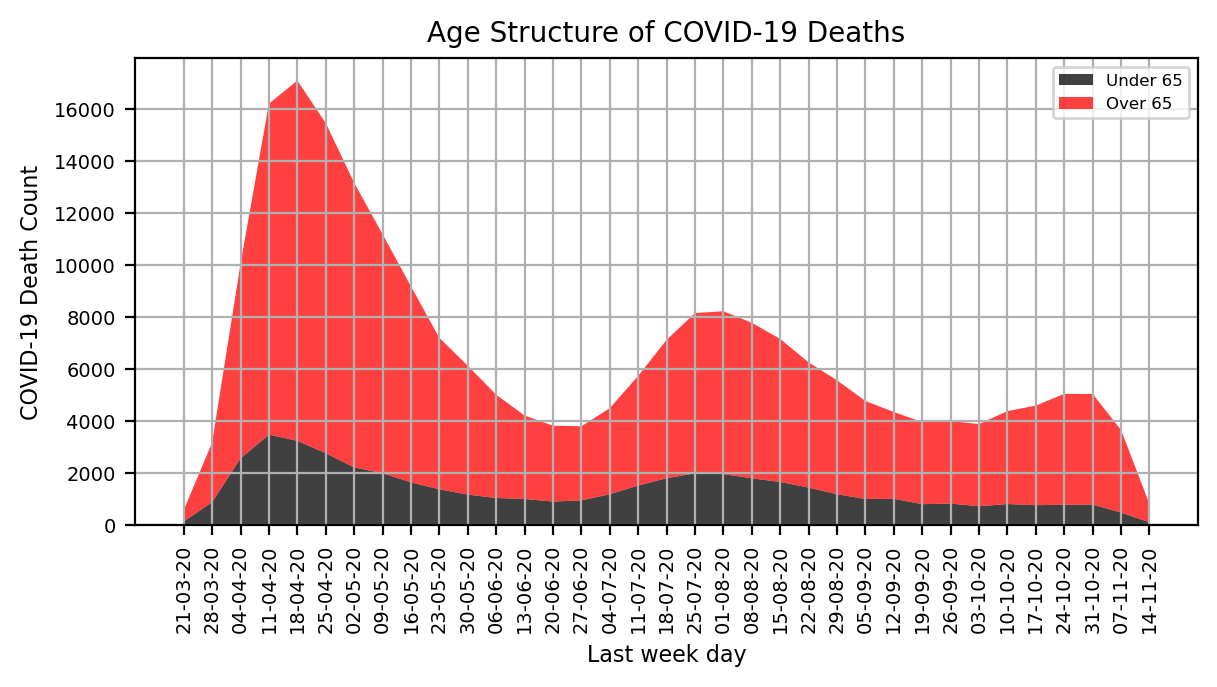

In [14]:
# total COVID deaths with fraction of 65+
plot_layered_65plus(covid_model_dict, end_week)

Raw COVID-19 age gradients and the logarithmic space:

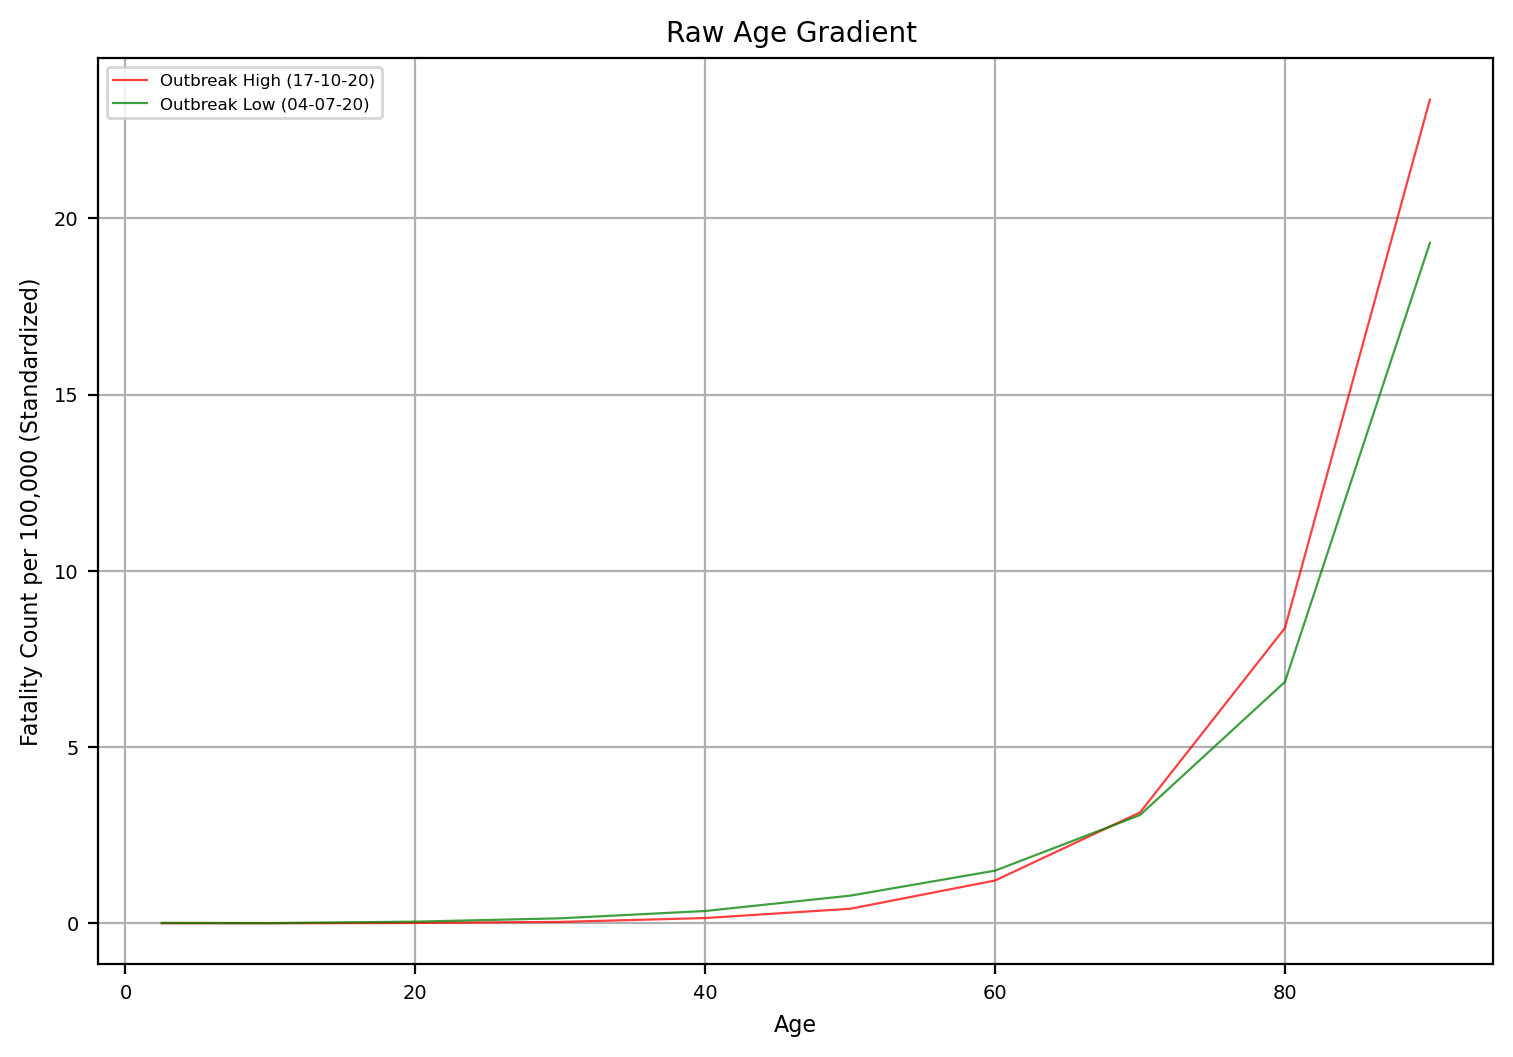

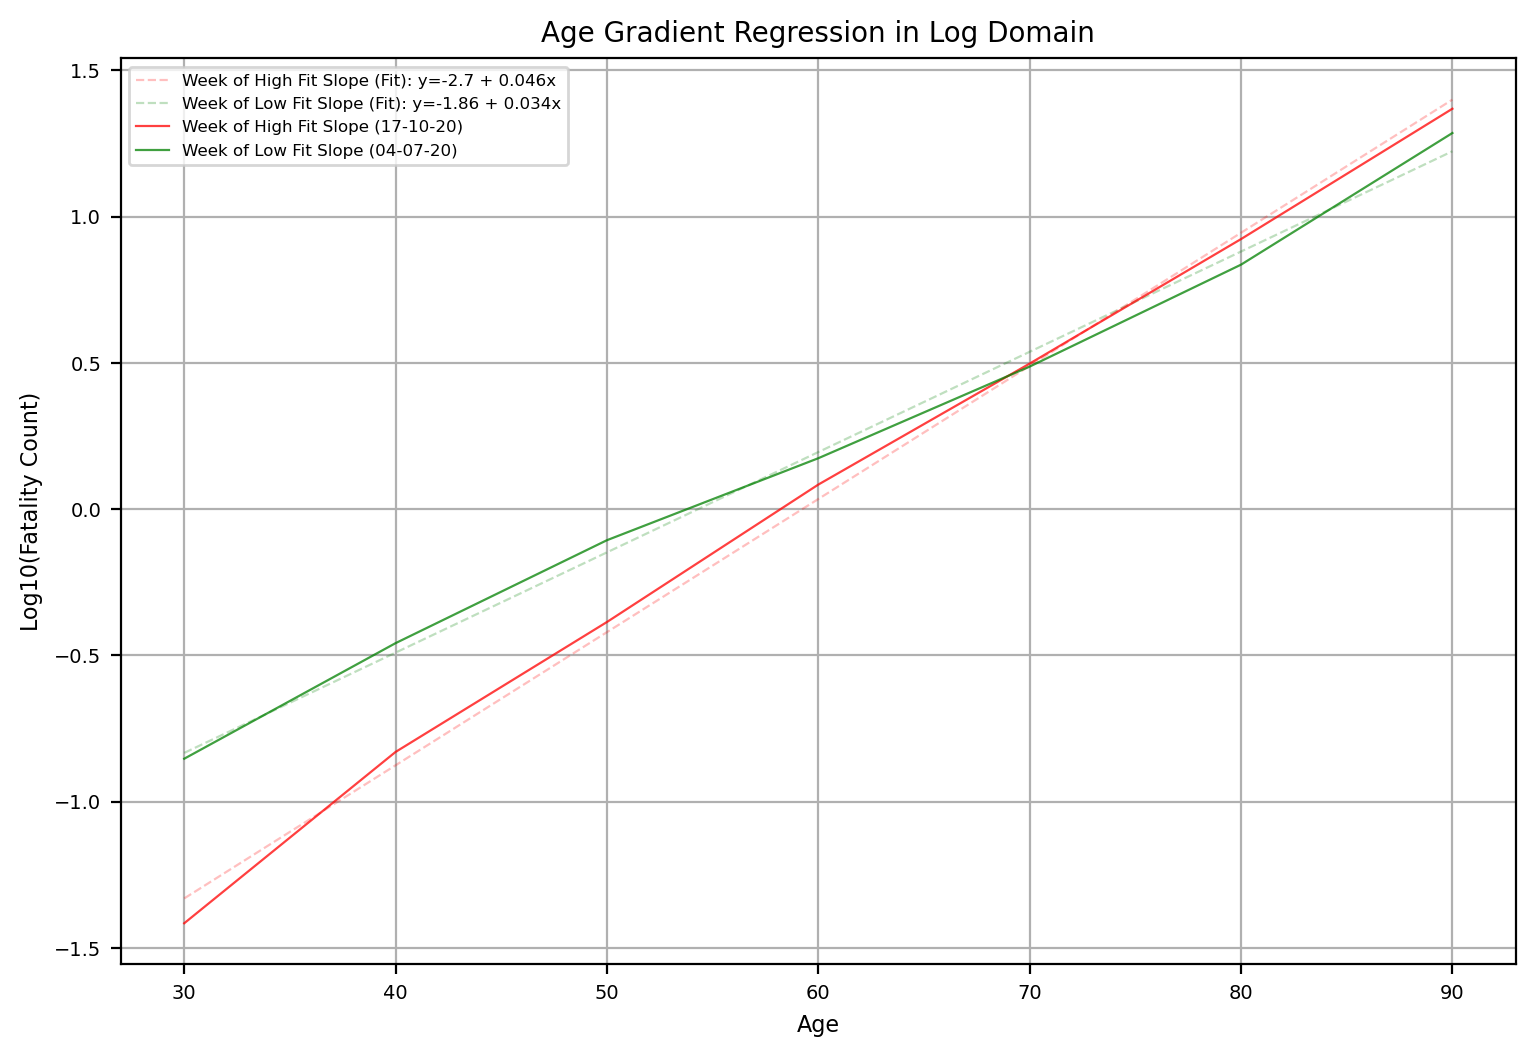

In [15]:
# raw vs log mortality
plot_deaths_regression_slopes(list_weeks_dicts, high_week, low_week, covid_model_dict, ages)

Now, 3 plots of COVID-19 age metrics vs COVID-19 death counts on the same plot:

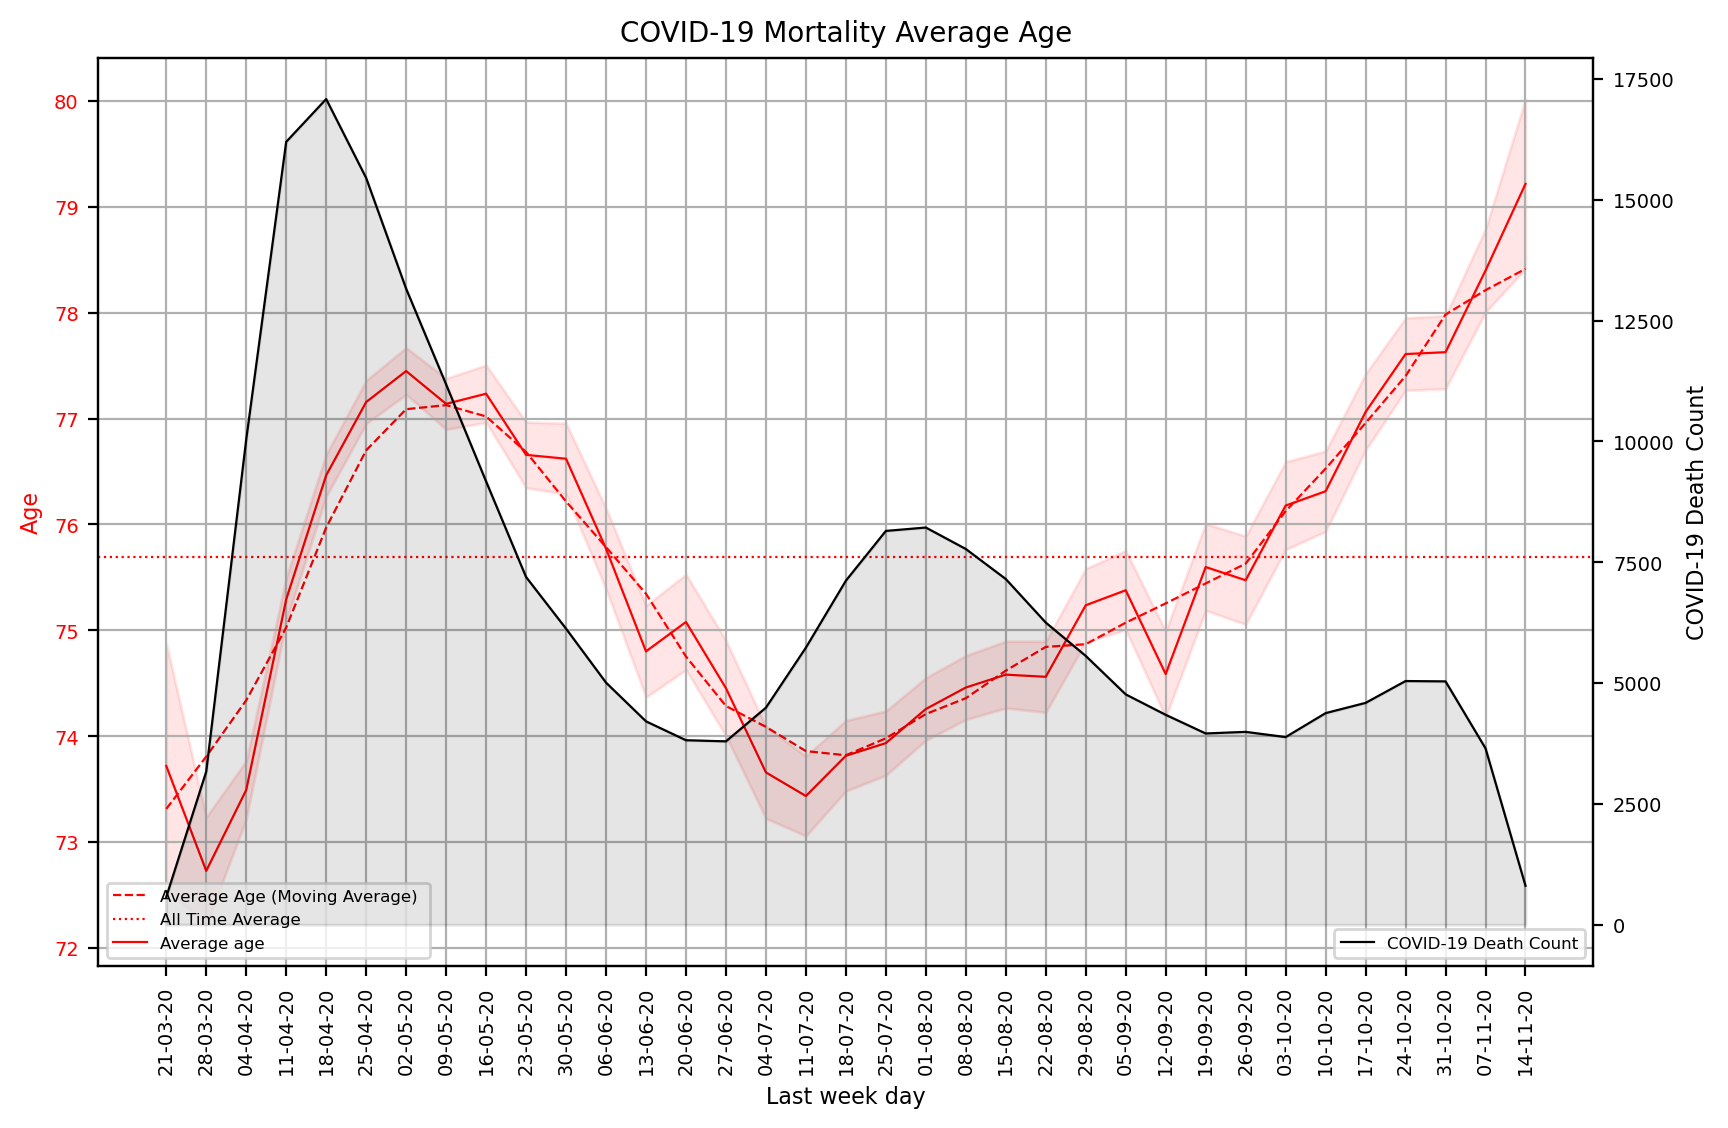

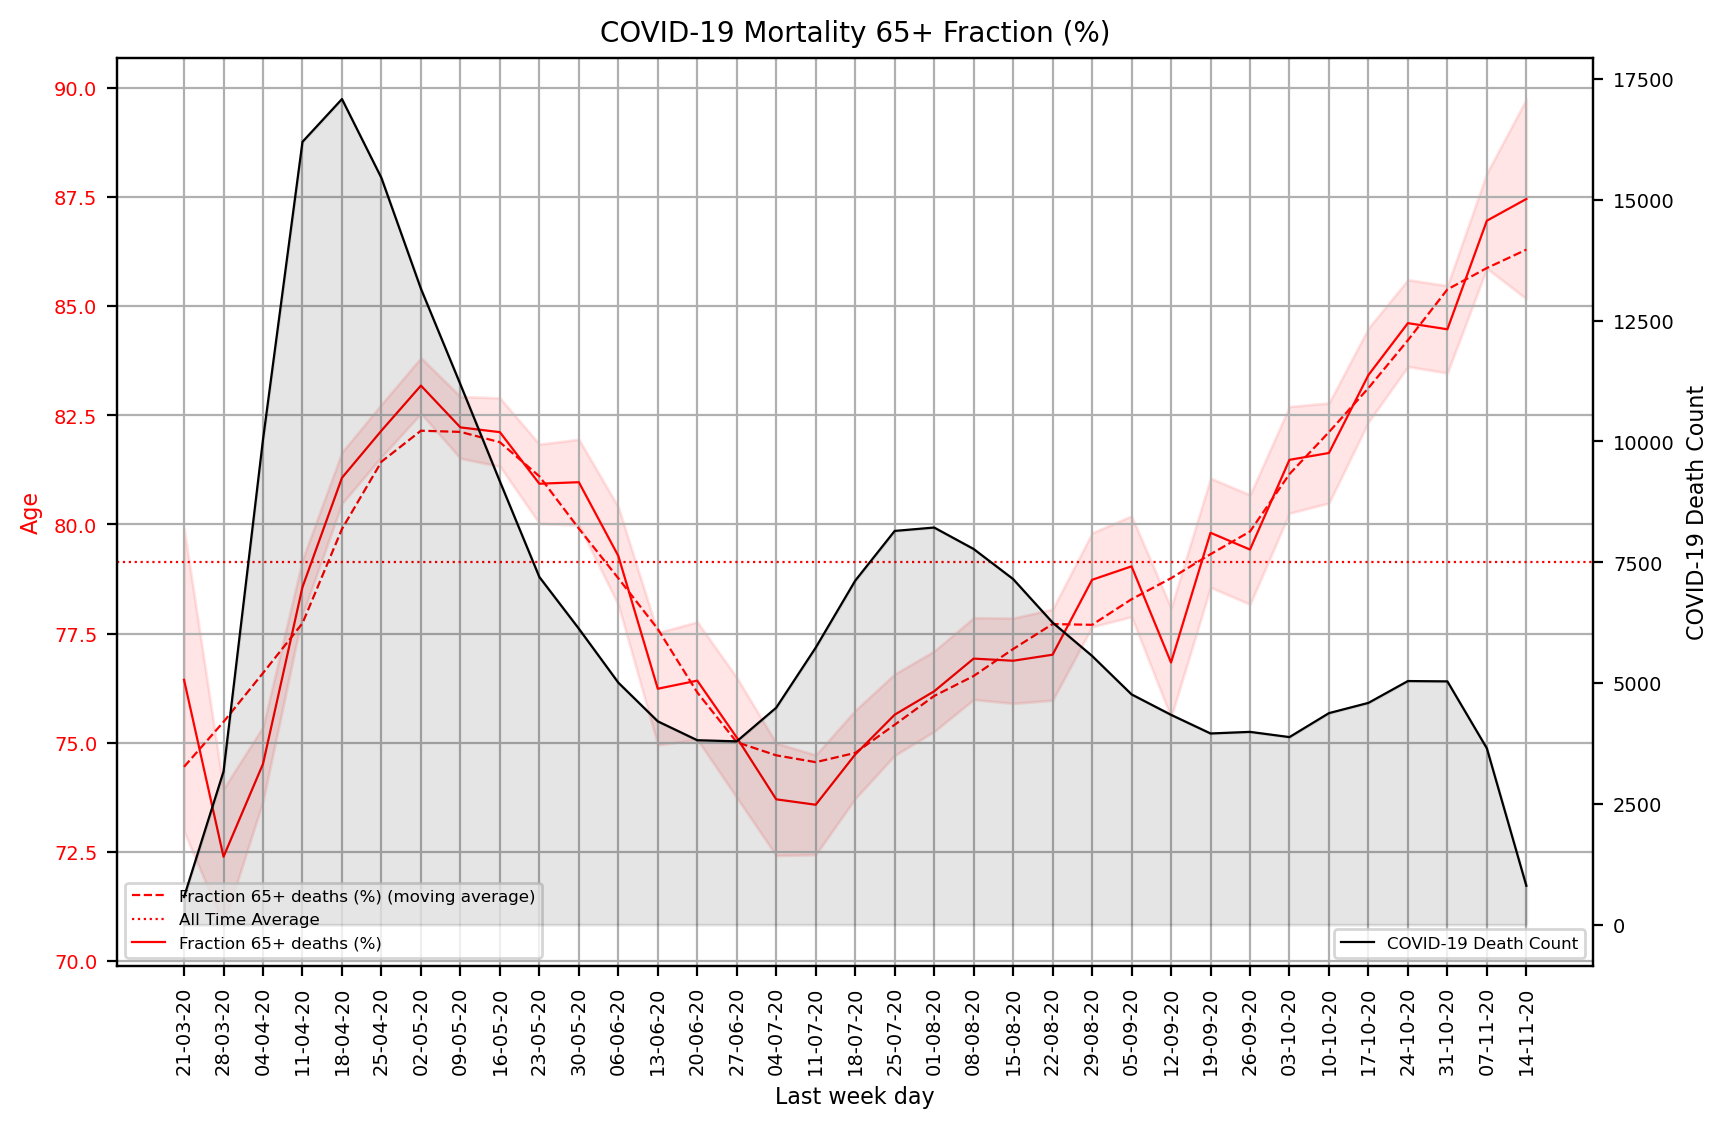

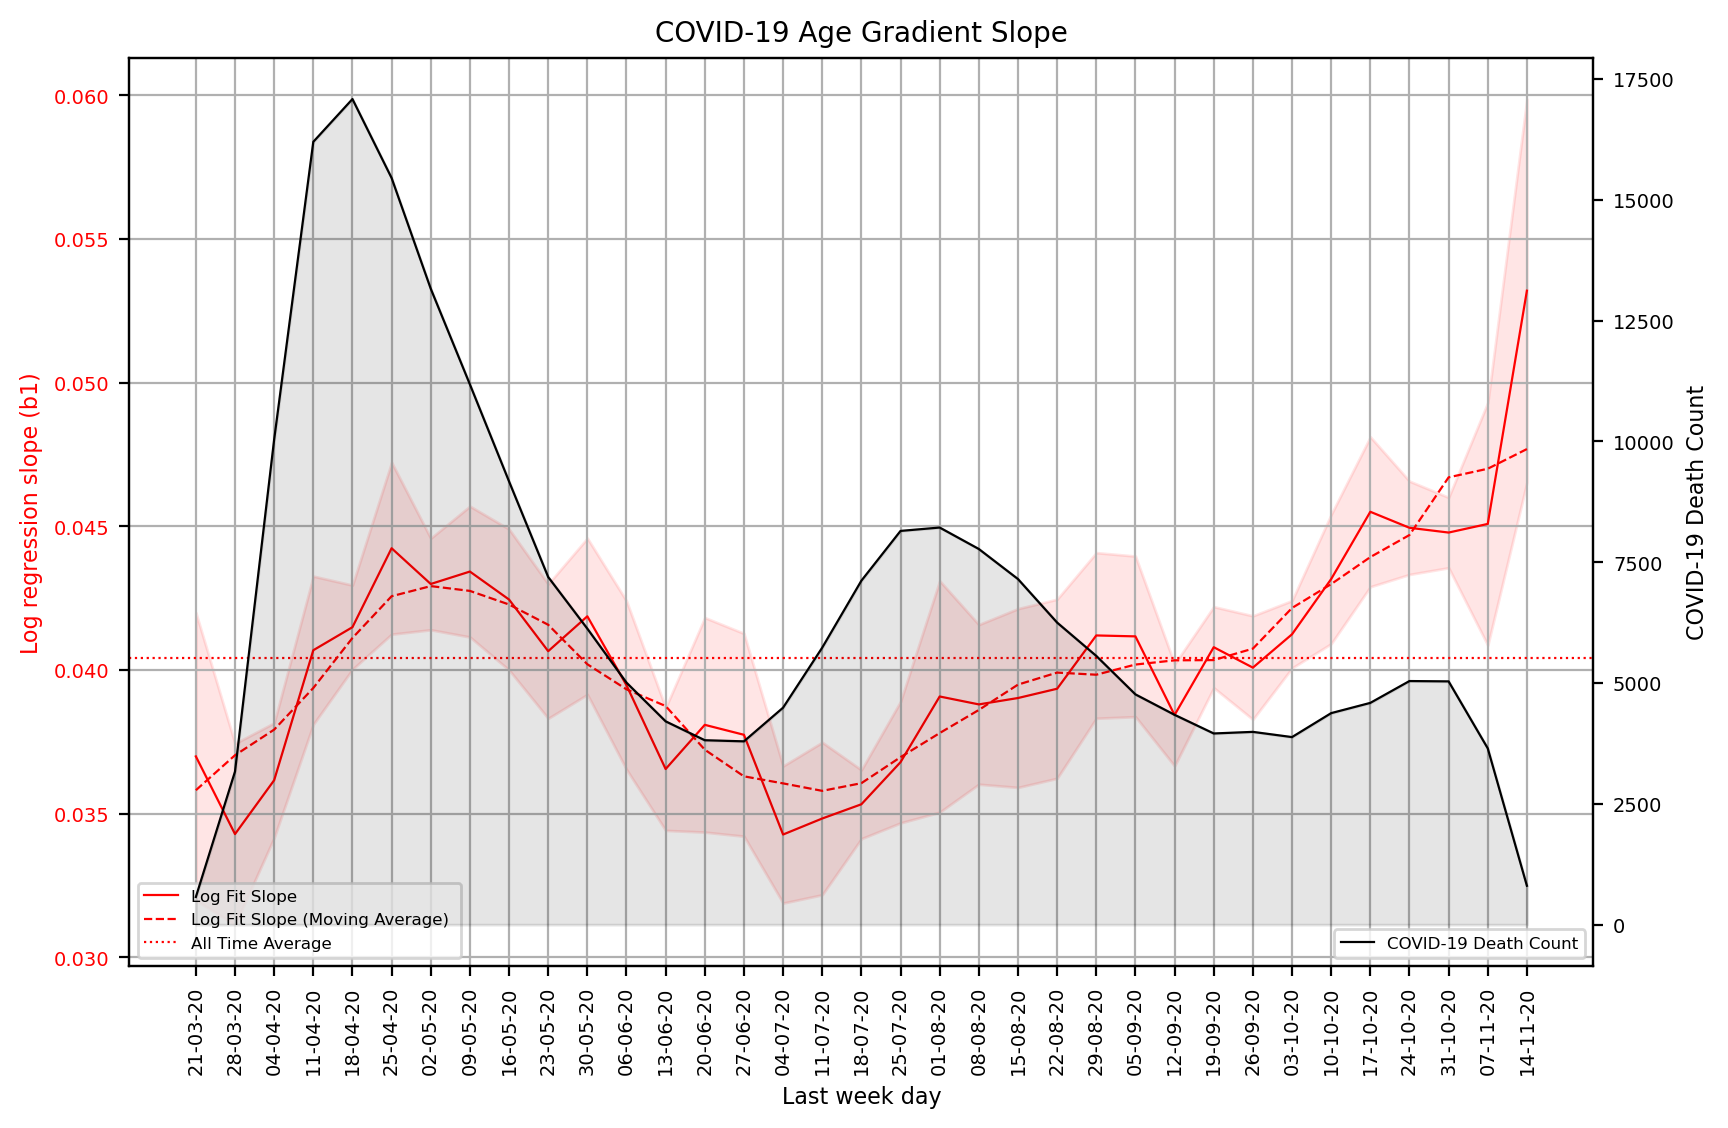

In [16]:
# 3 plots of metrics vs COVID deaths
plot_mortality_age_structure(covid_avg_dict, end_week)
plot_mortality_65plus(covid_avg_dict, covid_model_dict, end_week)
plot_slope_vs_deaths(end_week, covid_avg_dict, covid_model_dict)

Next, the 3 plots of COVID metrics vs non-COVID ones:

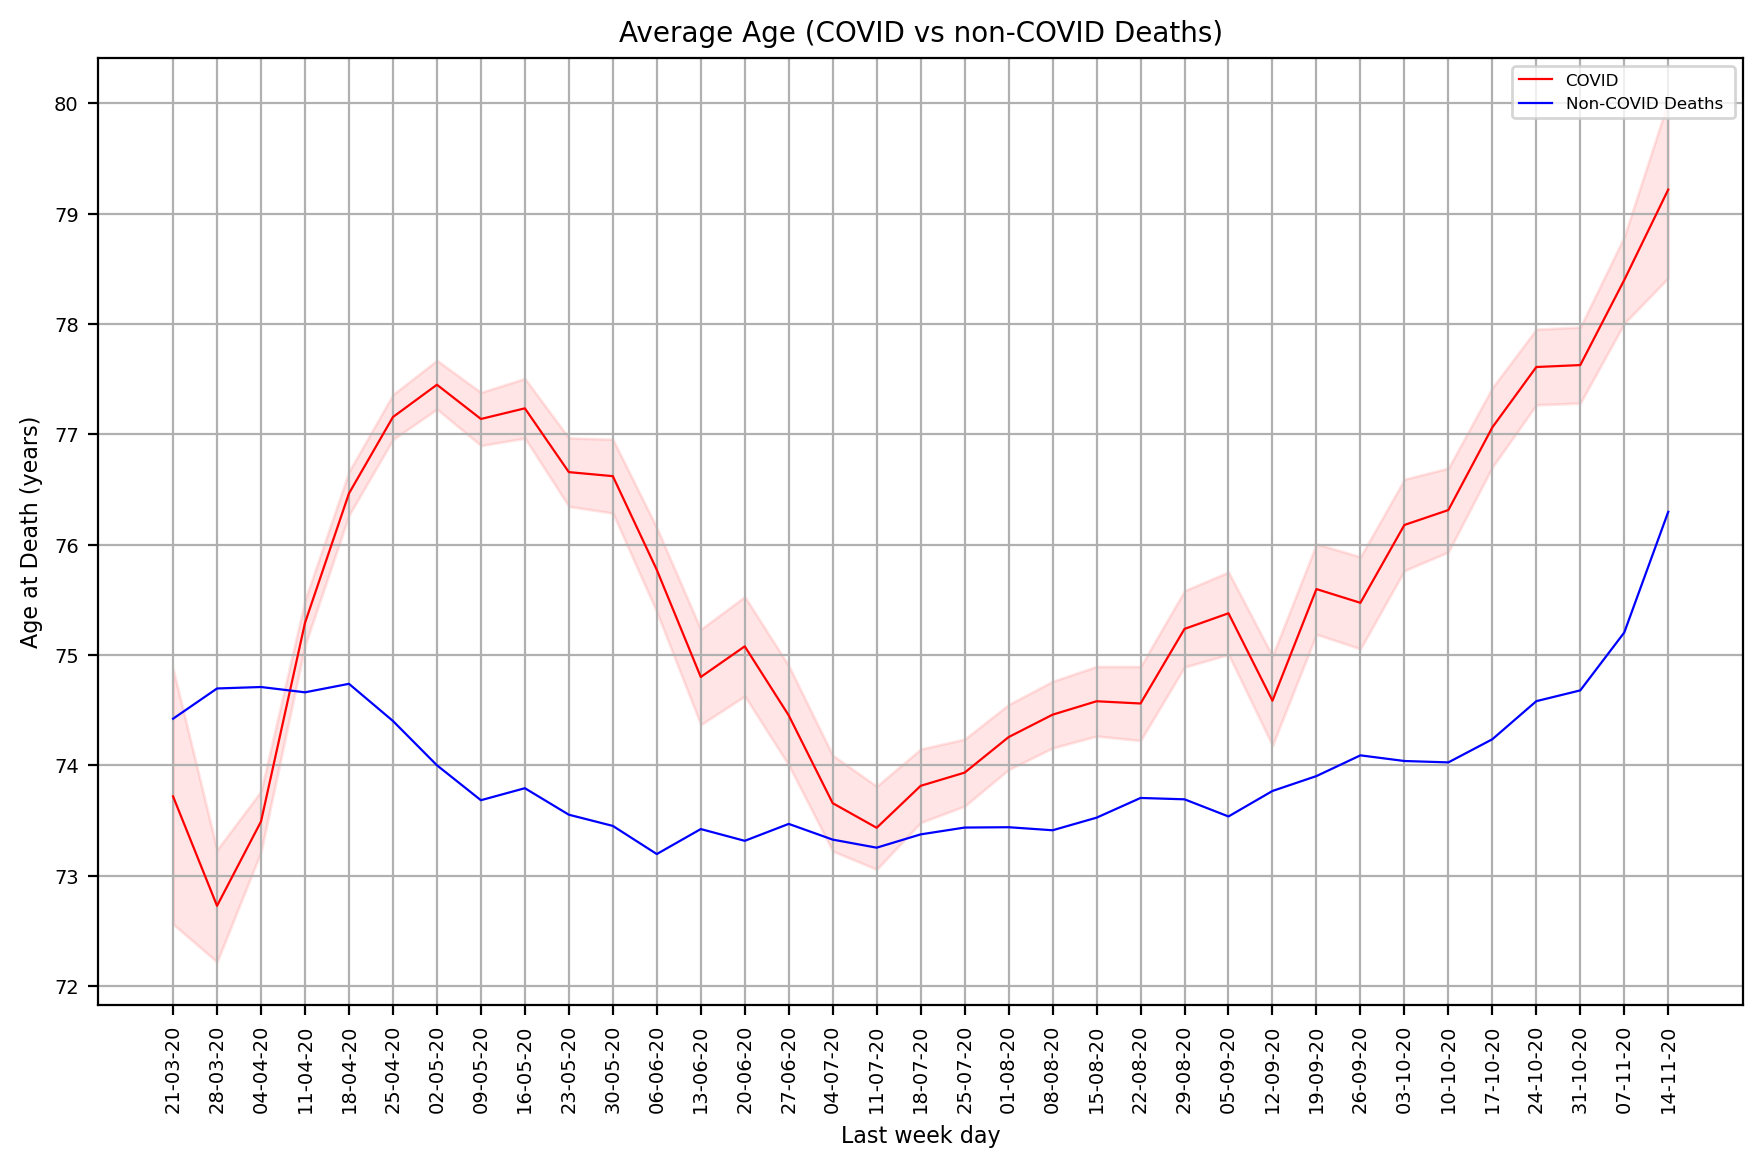

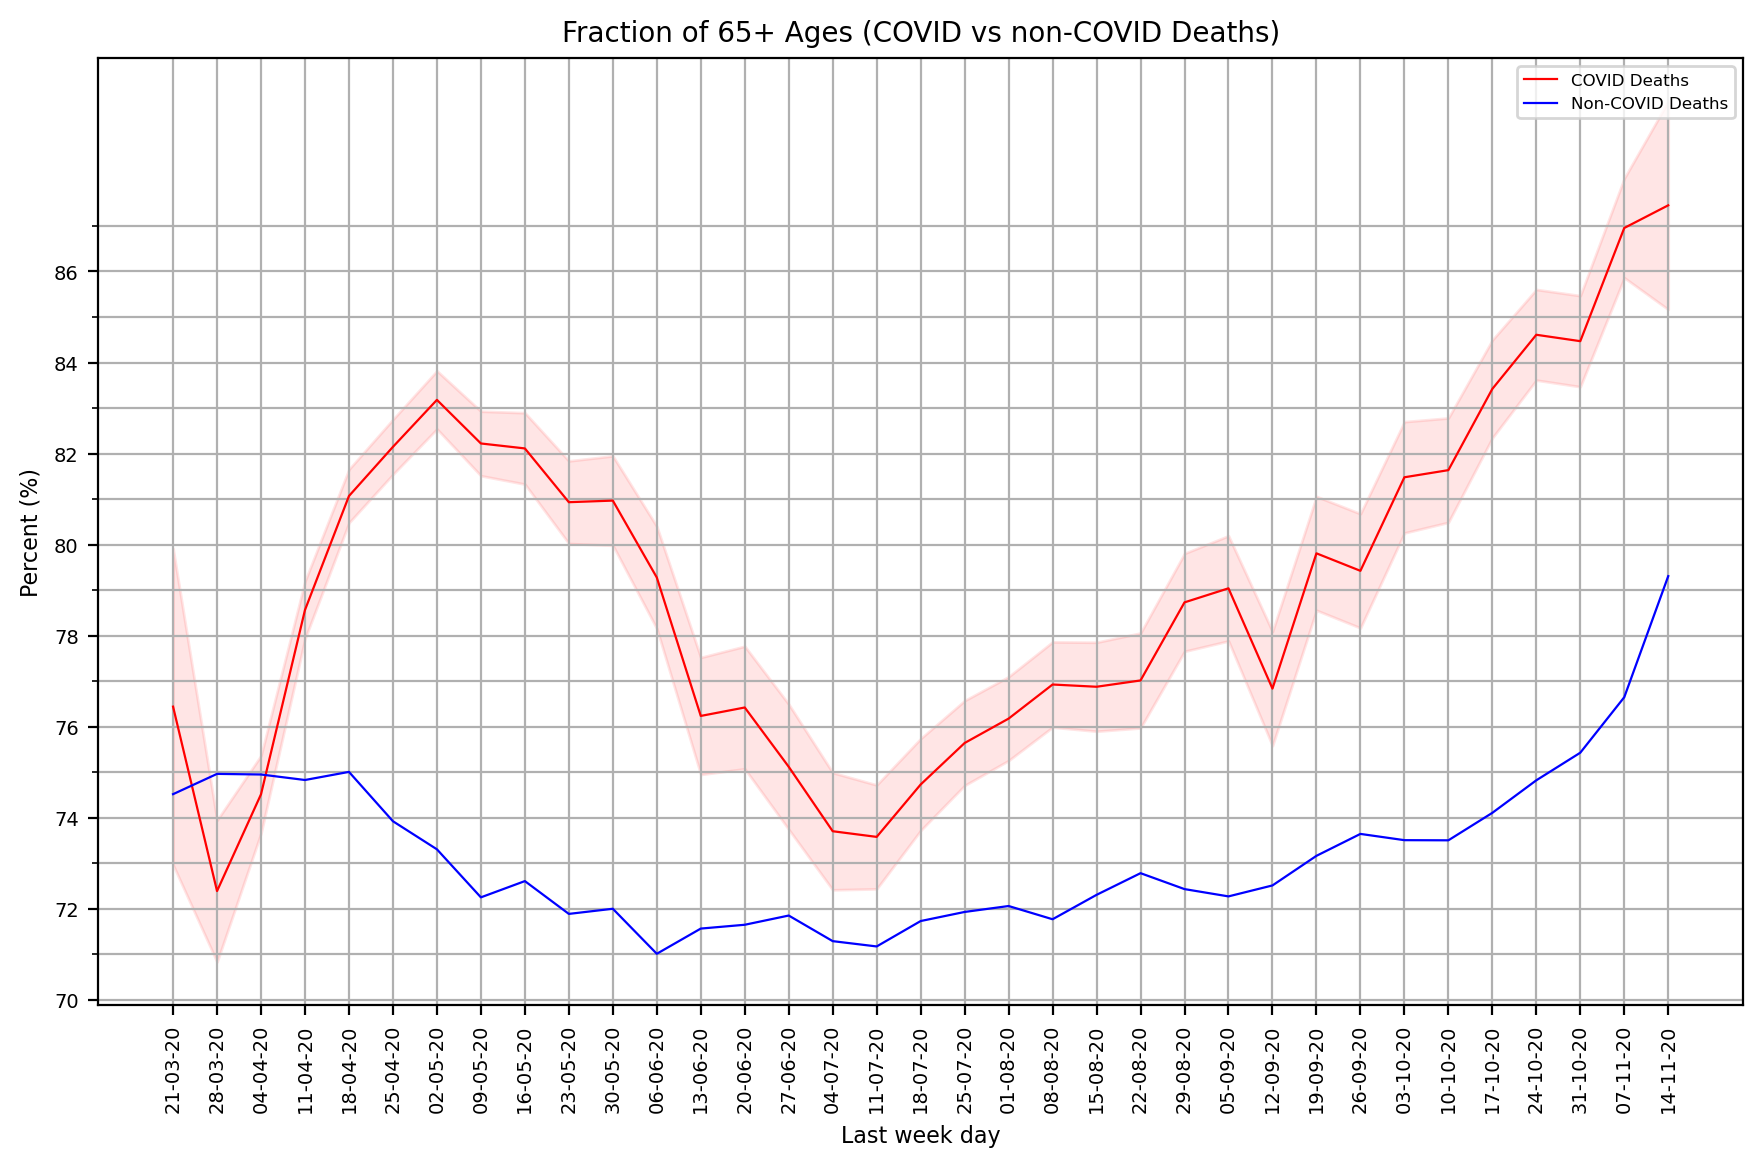

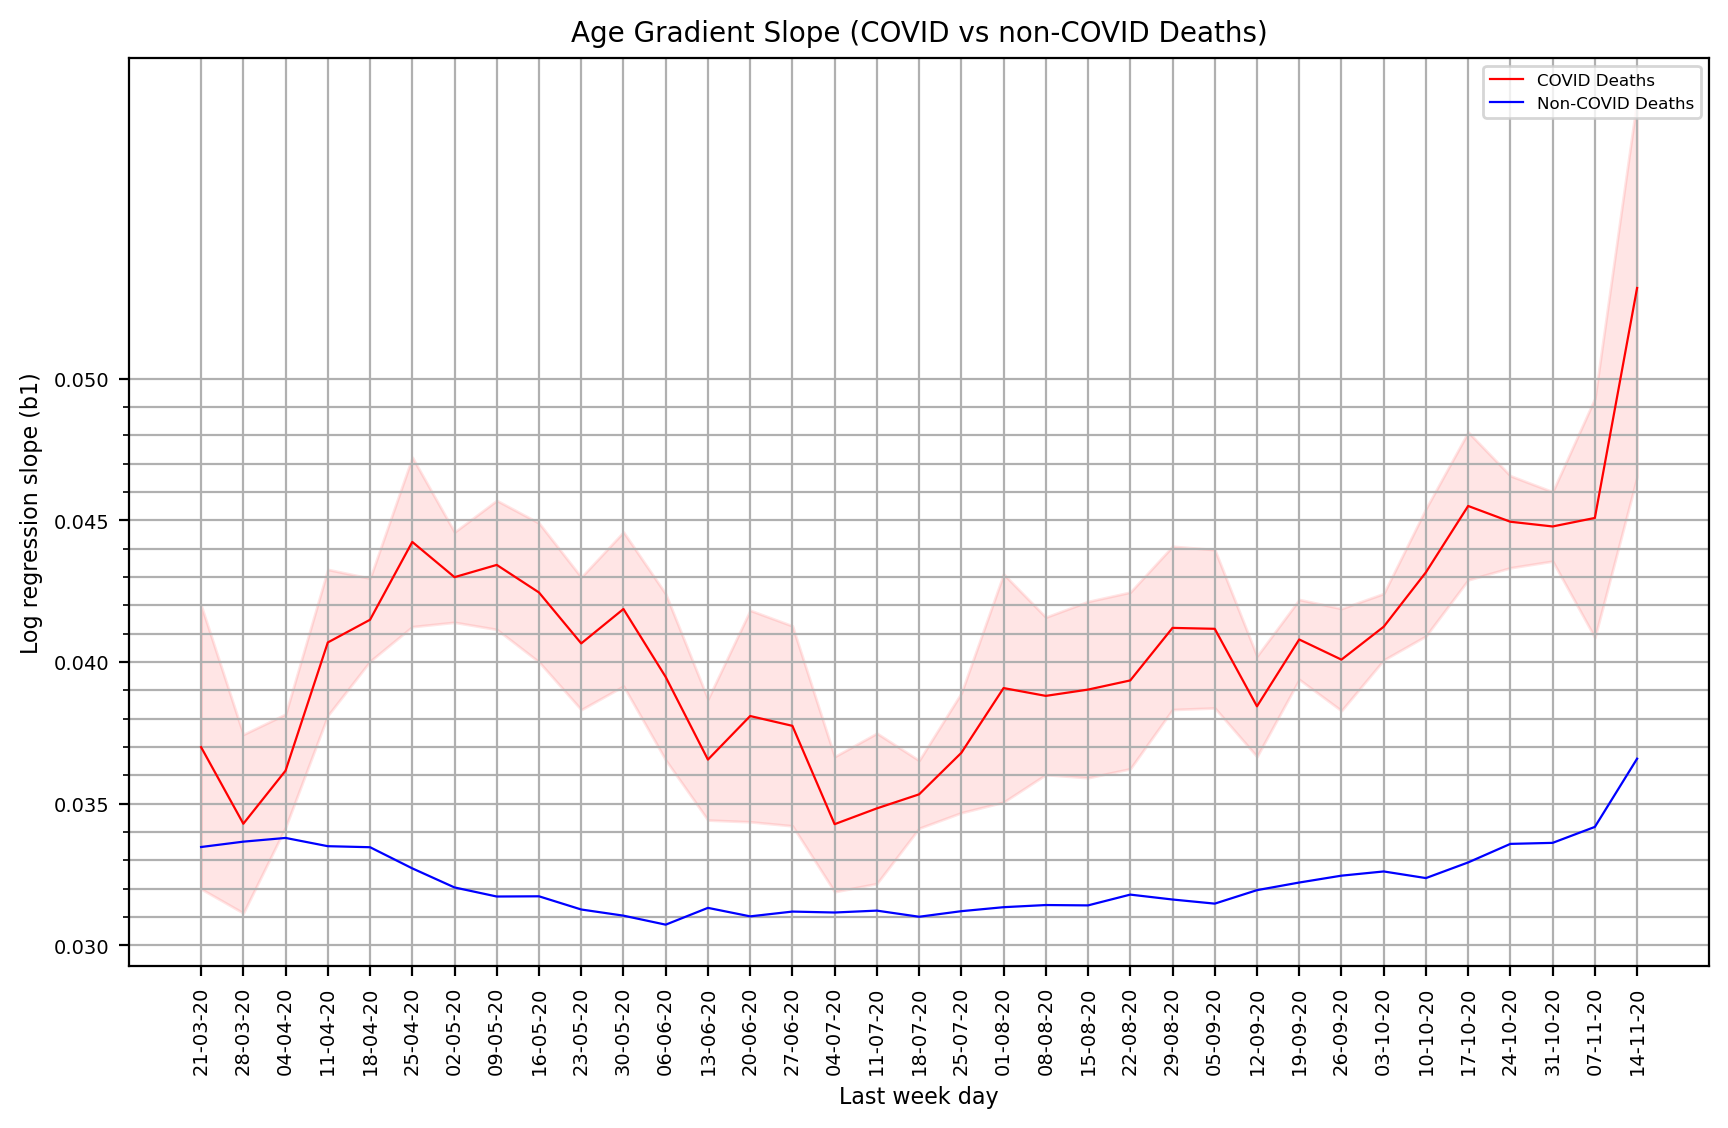

In [17]:
# 3 plots of metrics vs non-COVID metrics
plot_average_vs_noncovid(covid_avg_dict, non_avg_covid_dict, end_week)
plot_65plus_vs_noncovid(covid_model_dict, non_covid_model_dict, end_week)
plot_slope_vs_noncovid(covid_model_dict, non_covid_model_dict, end_week)

The non-COVID metrics show certain dynamic which may be due to either:
 - seasonal factors
 - some of the COVID related deaths have not been classified as such

Therere, it would be interesting to see how the *differentials* of  COVID-19 differentials over the non-COVID metrics woud look like:

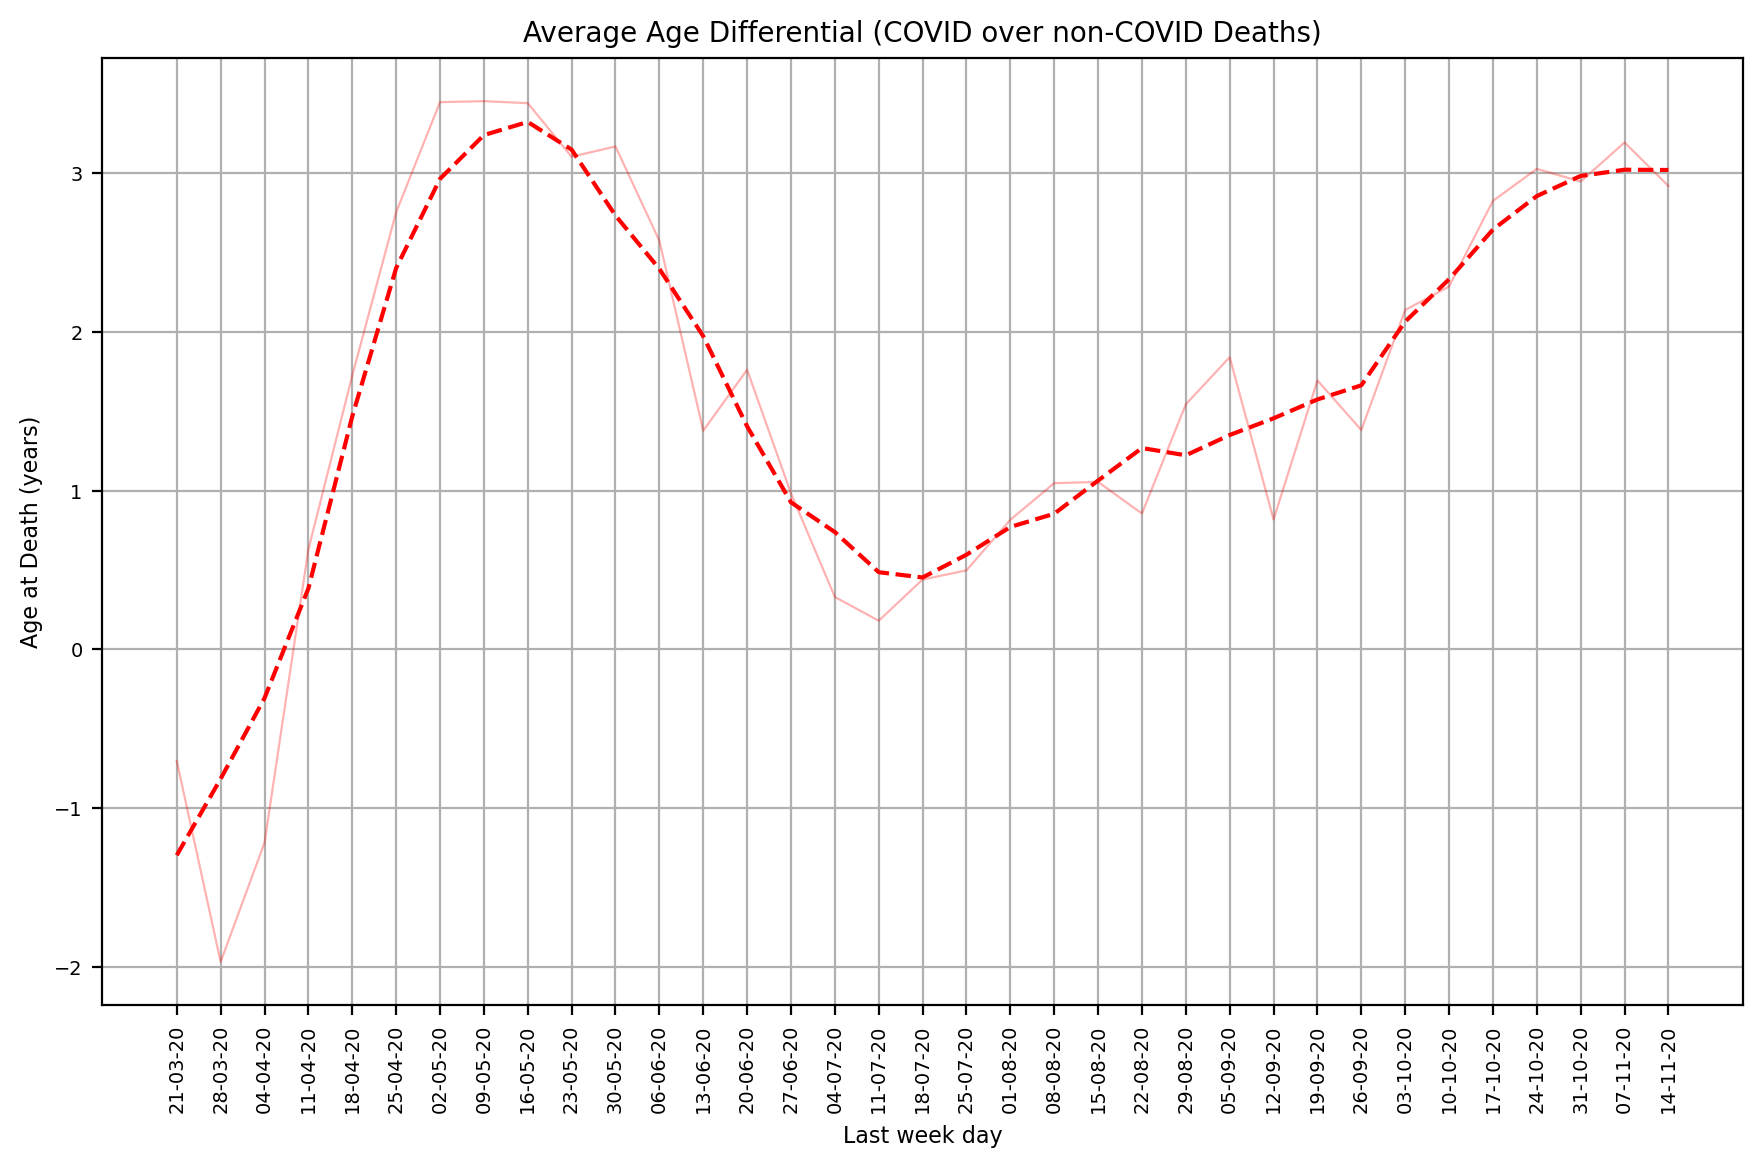

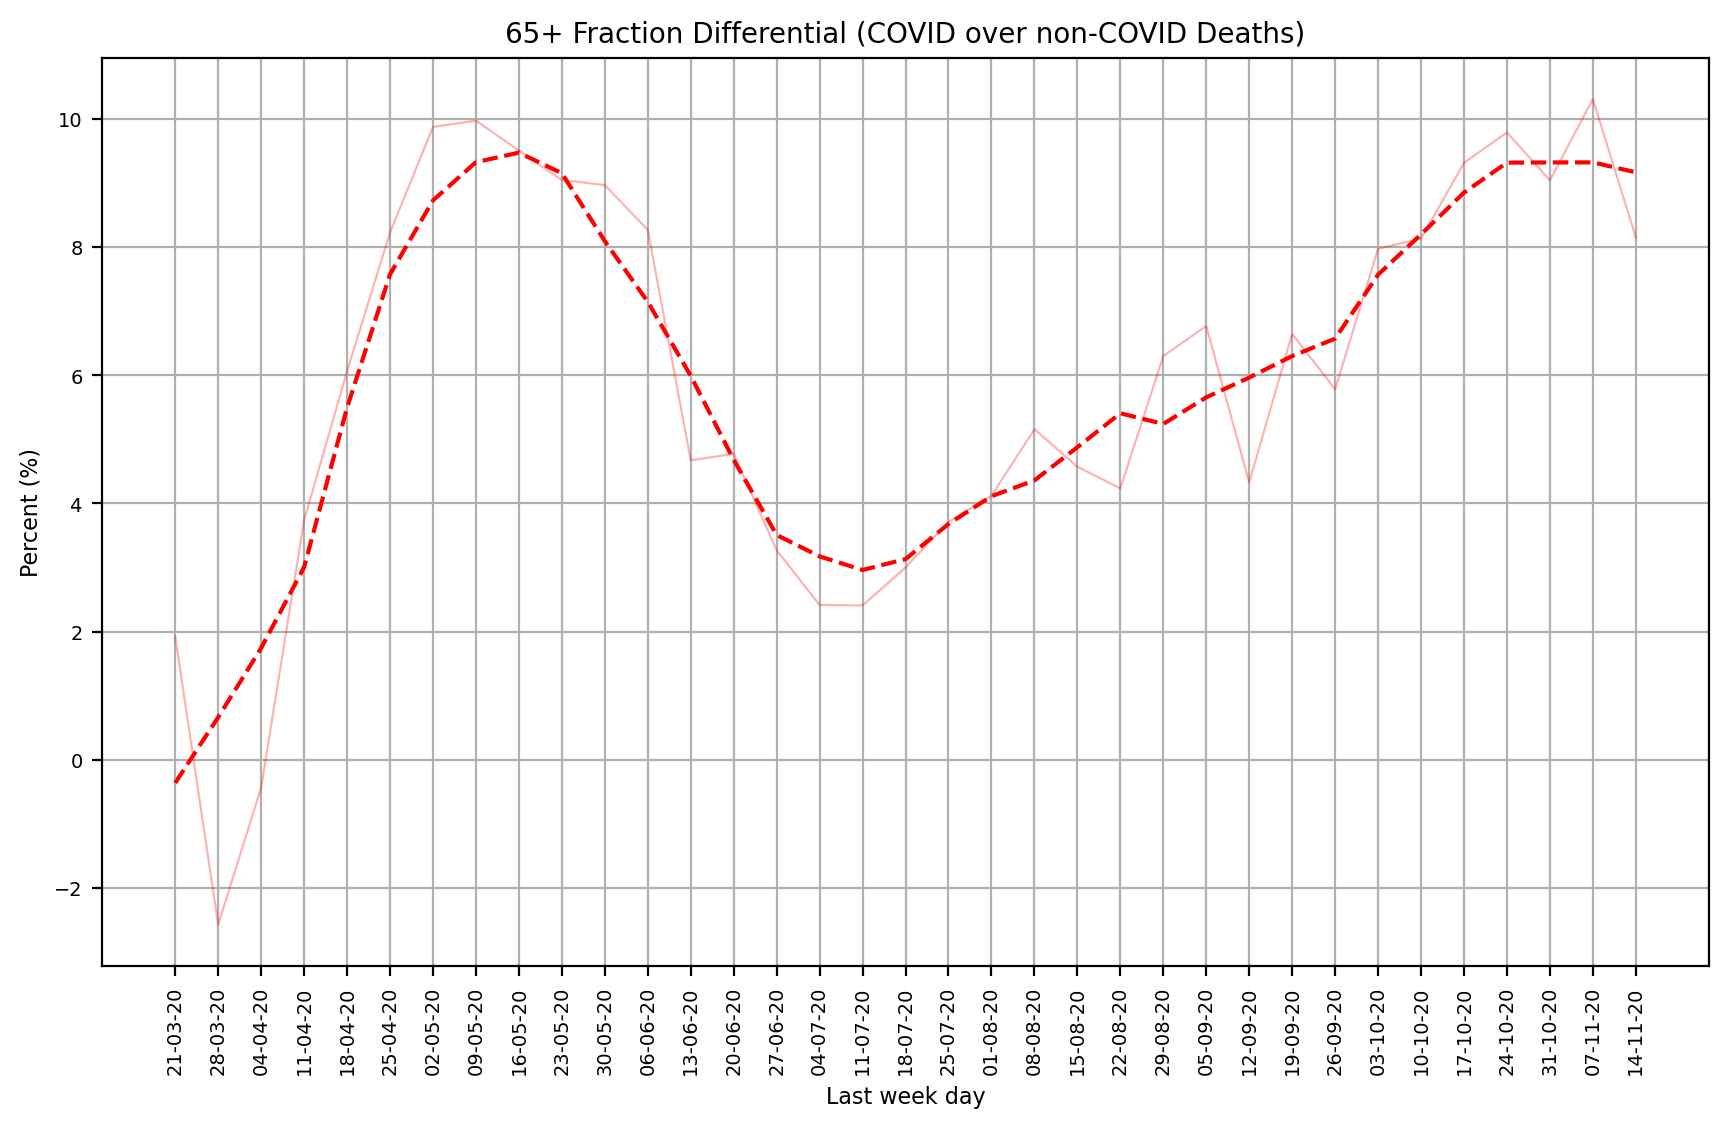

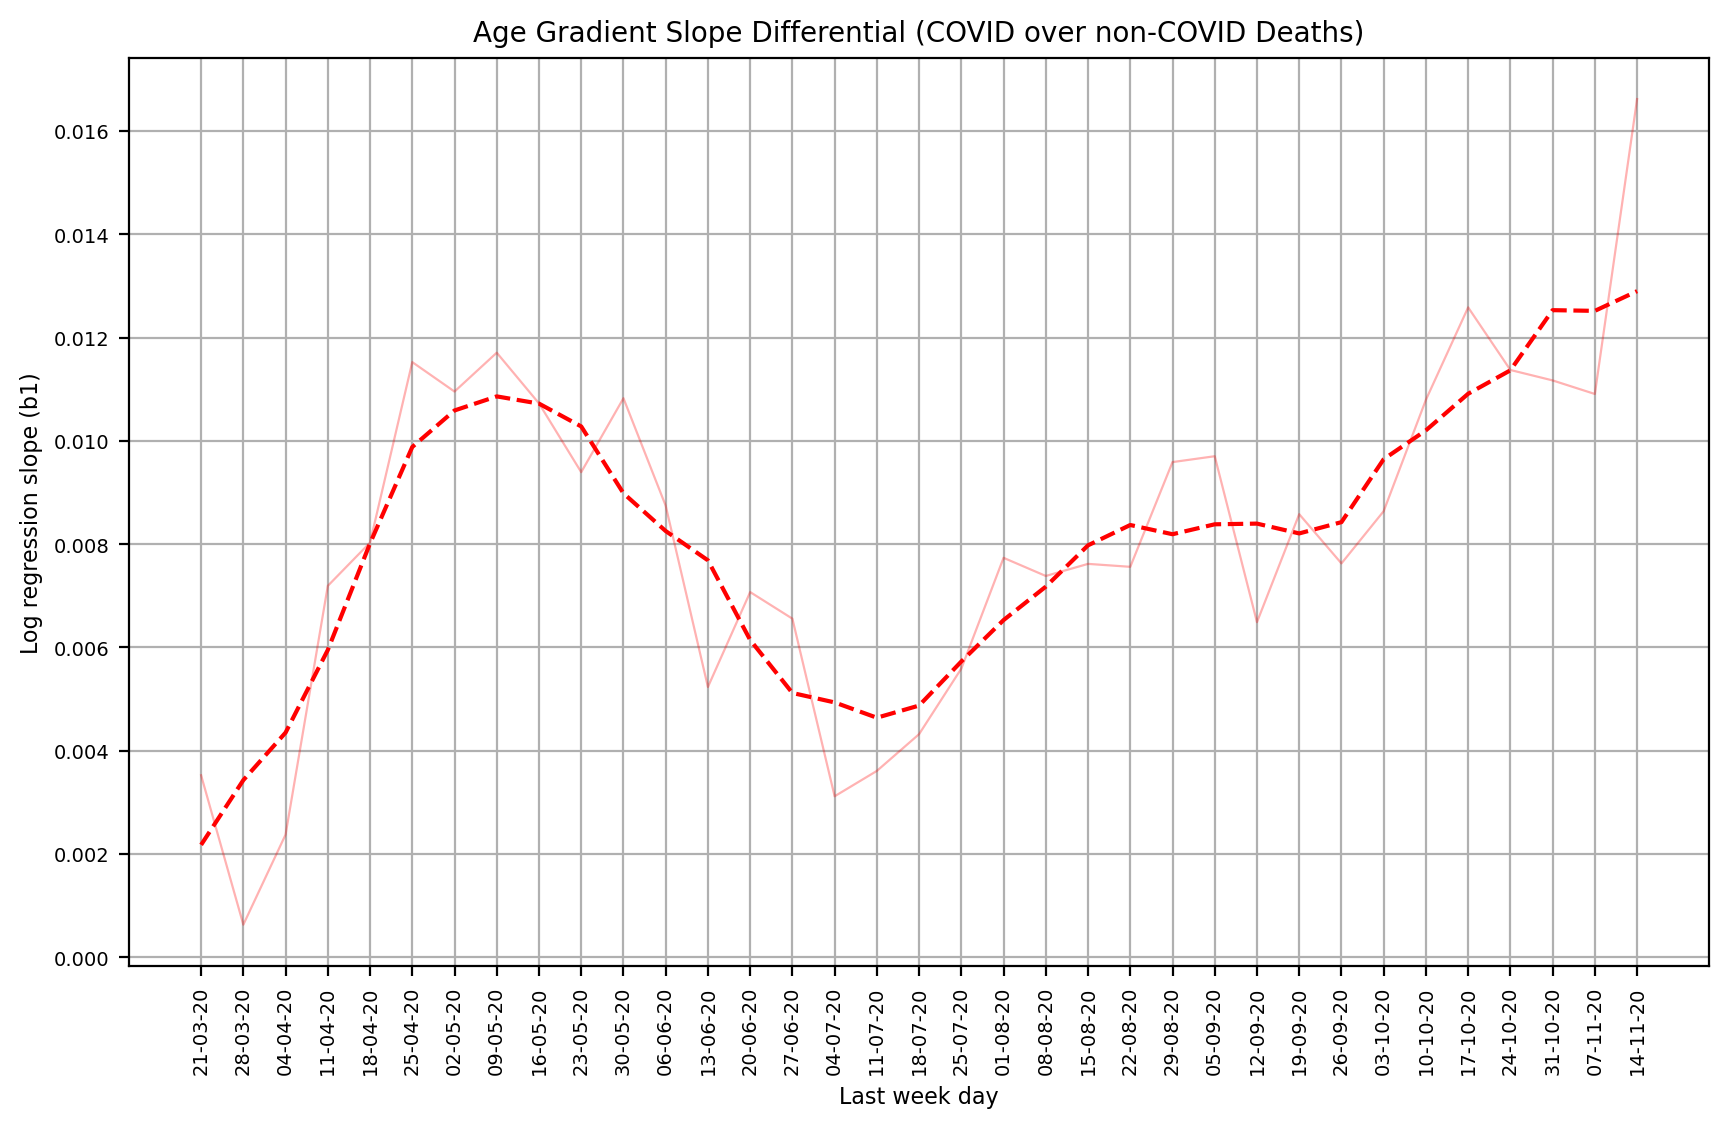

In [18]:
# 3 plots of metrics of differentials over non-COVID ones
plot_average_over_noncovid(covid_avg_dict, non_avg_covid_dict, end_week)
plot_65plus_over_noncovid(covid_model_dict, non_covid_model_dict, end_week)
plot_slope_over_noncovid(covid_model_dict, non_covid_model_dict, end_week)